## The Goal: Test length of time needed to find significant differences in coupling index between CESM1 and CESM2. 
<br>
<b>Author:</b> Meg Fowler <br>
<b>Date:</b> 9 Sep 2020 <br><br>

In [1]:
# Import libraries 
import comet as cm 
import numpy as np 
import xarray as xr 
import pickle
import pandas as pd
import datetime 

# Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util


## Read in data for CESM1 and CESM2 simulations 

In [5]:
#cesm1dir   = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/data/CESM1/'
cesm1dir = '/glade/work/mdfowler/data/CESM1/'
cesm2dir = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/data/day/'

# CESM2 file name structures
middleName_cesm2 = '_day_CESM2_amip_r10i1p1f1_gn_'
varNames_cesm2   = ['hfls','hfss','mrso','mrsos','tas','hurs','ps']
timeName_flx2    = ['19700101-19791231','19800101-19891231', 
                    '19900101-19991231','20000101-20091231']
timeName_soil2   = ['19500101-19991231','20000101-20150101']

# CESM1 file name structures 
startCLM_cesm1 = 'cam5.1_amip_1d_002.clm2.h1.'
startCAM_cesm1 = 'cam5.1_amip_1d_002.cam2.h1.'
endCLM_cesm1   = '_soilliqOnly.nc'
endIce_cesm1   = '_soiliceOnly.nc'
endFLX_cesm1   = '_sfcFluxes.nc'
timeName_cesm1 = ['1979-1989', '1990-1999', '2000-2006']


In [6]:
# Read in test file to get lat/lon (should be the same between sims)
fileName = cesm1dir+startCAM_cesm1+timeName_cesm1[0]+endFLX_cesm1
testDF   = xr.open_dataset(fileName, decode_times=True)

# Get lat and lon 
lat = testDF.lat.values
lon = testDF.lon.values 


### Read in CESM1 data
<b>Note:</b> This portion is carried out on a compute node of Casper due to the size of the files needing to be read in. 

In [7]:
# Read in files and get time as usable format 
file1 = cesm1dir+startCAM_cesm1+timeName_cesm1[0]+endFLX_cesm1
flxDF = xr.open_dataset(file1, decode_times=True)
flxDF['time'] = flxDF.indexes['time'].to_datetimeindex()
print('File 1 finished reading in...')

file2  = cesm1dir+startCAM_cesm1+timeName_cesm1[1]+endFLX_cesm1
flxDF2 = xr.open_dataset(file2, decode_times=True) 
flxDF2['time'] = flxDF2.indexes['time'].to_datetimeindex()
print('File 2 finished reading in...')

file3  = cesm1dir+startCAM_cesm1+timeName_cesm1[2]+endFLX_cesm1
flxDF3 = xr.open_dataset(file3, decode_times=True) 
flxDF3['time'] = flxDF3.indexes['time'].to_datetimeindex()
print('File 3 finished reading in...')

# Concat in one array 
flux_full  = xr.concat([flxDF,  flxDF2, flxDF3], dim="time")


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  after removing the cwd from sys.path.


File 1 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  if __name__ == '__main__':


File 2 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  


File 3 finished reading in...


In [8]:
# Read in files and get time as usable format 
file1 = cesm1dir+startCLM_cesm1+timeName_cesm1[0]+endCLM_cesm1
soilDF = xr.open_dataset(file1, decode_times=True)
soilDF['time'] = soilDF.indexes['time'].to_datetimeindex()
print('File 1 finished reading in...')
soilDF = soilDF.where(soilDF.levgrnd<2.12193400e-01, drop=True)  # Ignore lower down levels 

file2  = cesm1dir+startCLM_cesm1+timeName_cesm1[1]+endCLM_cesm1 
soilDF2 = xr.open_dataset(file2, decode_times=True) 
soilDF2['time'] = soilDF2.indexes['time'].to_datetimeindex()
print('File 2 finished reading in...')
soilDF2 = soilDF2.where(soilDF2.levgrnd<2.12193400e-01, drop=True)

file3  = cesm1dir+startCLM_cesm1+timeName_cesm1[2]+endCLM_cesm1 
soilDF3 = xr.open_dataset(file3, decode_times=True) 
soilDF3['time'] = soilDF3.indexes['time'].to_datetimeindex()
print('File 3 finished reading in...')
soilDF3 = soilDF3.where(soilDF3.levgrnd<2.12193400e-01, drop=True)

# Concat in one array 
soil_full  = xr.concat([soilDF,  soilDF2, soilDF3], dim="time")


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  after removing the cwd from sys.path.


File 1 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.


File 2 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  app.launch_new_instance()


File 3 finished reading in...


In [9]:
# Read in files and get time as usable format 
file1 = cesm1dir+startCLM_cesm1+timeName_cesm1[0]+endIce_cesm1
soilDF = xr.open_dataset(file1, decode_times=True)
soilDF['time'] = soilDF.indexes['time'].to_datetimeindex()
print('File 1 finished reading in...')
soilDF = soilDF.where(soilDF.levgrnd<2.12193400e-01, drop=True)  # Ignore lower down levels 

file2  = cesm1dir+startCLM_cesm1+timeName_cesm1[1]+endIce_cesm1 
soilDF2 = xr.open_dataset(file2, decode_times=True) 
soilDF2['time'] = soilDF2.indexes['time'].to_datetimeindex()
print('File 2 finished reading in...')
soilDF2 = soilDF2.where(soilDF2.levgrnd<2.12193400e-01, drop=True)

file3  = cesm1dir+startCLM_cesm1+timeName_cesm1[2]+endIce_cesm1 
soilDF3 = xr.open_dataset(file3, decode_times=True) 
soilDF3['time'] = soilDF3.indexes['time'].to_datetimeindex()
print('File 3 finished reading in...')
soilDF3 = soilDF3.where(soilDF3.levgrnd<2.12193400e-01, drop=True)

# Concat in one array 
soilIce_full  = xr.concat([soilDF,  soilDF2, soilDF3], dim="time")


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  after removing the cwd from sys.path.


File 1 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.


File 2 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  app.launch_new_instance()


File 3 finished reading in...


In [10]:
# Load pressure level of LCL (computed separately in Get_LCLpressure.py and saved as pickle file)
lclPath = '/glade/work/mdfowler/scripts/Coupling_CAM6CLM5/processed_data/LCL-pressure-HeightAboveGround_CESM1.p'
Plcl    = pickle.load( open( lclPath, "rb" ) )


In [11]:
# To be able to easily access years, months, days - use Pandas 
dates_cesm1 = pd.DatetimeIndex(soil_full['time'].values)


In [12]:
# Read in land fraction 
filePath = '/glade/work/mdfowler/data/CESM1/cam5.1_amip_1d_002.clm2.h1.1979-01-01-00000.nc'
exDF = xr.open_dataset(filePath,decode_times=False)

landMask              = exDF.landmask.values.astype(float)
landMask[landMask==0] = np.nan

# landArea = exDF.area.values * exDF.landfrac.values

**Get 10 cm soil moisture by itself**

In [13]:
# Sum over top 4 levels to get top 11cm of soil water/ice 
soilLiq_11cm = np.nansum(soil_full.SOILLIQ.values,    axis=1)*landMask
soilIce_11cm = np.nansum(soilIce_full.SOILICE.values, axis=1)*landMask

# Get as close to "mrsos" as possible by including liq and ice, and dividing by land area 
soil_11cm = (soilLiq_11cm + soilIce_11cm)


In [14]:
# Mask Greenland and Antarctica (SM = 0 as time mean)
soilMean = np.nanmean(soil_11cm,0)

iceMask = np.ones([len(flux_full.lat.values),len(flux_full.lon.values)])

for i in range(len(flux_full.lat.values)):
    soilMean_sel = soilMean[i,:]
    iceMask[i, soilMean_sel>130] = np.nan

# Apply mask
soil_11cm = soil_11cm*iceMask


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


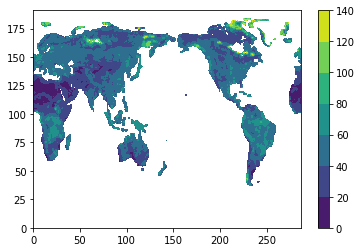

In [16]:
# Quick sanity check of upper level soil moisture...
plt.contourf(soil_11cm[10,:,:])
plt.colorbar()


### Read in CESM2 data
(This part done locally on laptop)

**Get same time period for CESM2 data as in CESM1**

## Compute coupling index in select period

In [39]:
# Define period of interest 
strtYear = 1980
endYear  = 1989 

# For writing out to a file, define string yr label
strLabel = str(strtYear)+'-'+str(endYear)+'.nc'
print(strLabel)

1980-1989.nc


### Compute for CESM1 
<b>Note:</b> This portion is carried out on a compute node of Casper due to the size of the files needing to be read in.

In [40]:
# Get indices of this time period 
iInclude = np.where((dates_cesm1.year>=strtYear) & (dates_cesm1.year<=endYear))[0]

# Limit data to this period 
soil_11cm_sel = soil_11cm[iInclude,:,:]
Plcl_sel      = Plcl[iInclude,:,:]
flux_full_sel = flux_full.isel(time=iInclude)

print(np.shape(soil_11cm_sel))

(3650, 192, 288)


In [41]:
# Make one big xr.Dataset containing all the information we need  
dFull = flux_full_sel
dFull['soilM_10'] = (('time','lat','lon'), soil_11cm_sel)
dFull['Plcl'] = (('time','lat','lon'), Plcl_sel)


**Get terra coupling with LH and SM**

In [42]:
# Compute coupling index
terra_coupling = cm.metrics.CouplingIndex()
terra_coupling = terra_coupling.compute(dFull, xname='soilM_10',yname='LHFLX',averaging='season')

# Save to netCDF file
terra_LH_dir  = '/glade/work/mdfowler/scripts/Coupling_CAM6CLM5/processed_data/'
terra_LH_file = terra_LH_dir+'CESM1_TerraLeg_coupling_lhf_vs_soilm_'+strLabel
terra_coupling.to_netcdf(terra_LH_file)


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Terrestrial Coupling Index (11cm SM and LHFLX) [DJF]')

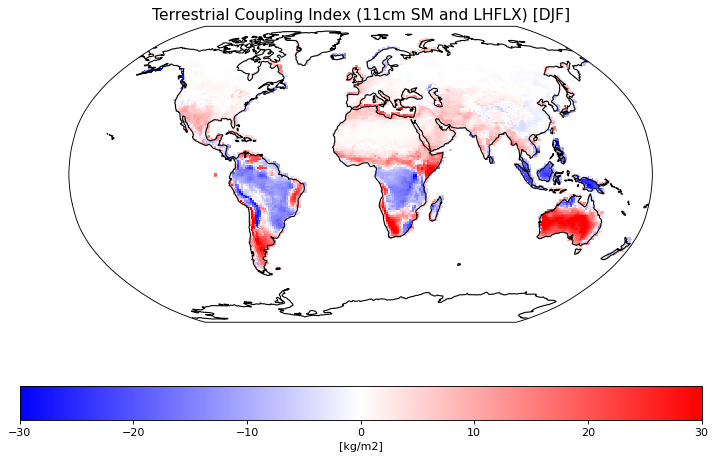

In [43]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_DJF, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.soilM_10_LHFLX_CI[0,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_DJF,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (11cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[0]+']', fontsize=14)


**Get terra coupling with SH and SM**

In [44]:
# Compute coupling index 
terraLeg_coupling = cm.metrics.CouplingIndex()
terraLeg_coupling = terraLeg_coupling.compute(dFull, xname='soilM_10',yname='SHFLX',averaging='season')

# Save to netCDF file
terra_SH_dir  = '/glade/work/mdfowler/scripts/Coupling_CAM6CLM5/processed_data/'
terra_SH_file = terra_SH_dir+'CESM1_TerraLeg_coupling_shf_vs_soilm_'+strLabel
terraLeg_coupling.to_netcdf(terra_SH_file)


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


**Get atmospheric leg coupling with SH and Plcl**

In [45]:
# Compute coupling index 
atmoLeg_coupling = cm.metrics.CouplingIndex()
atmoLeg_coupling = atmoLeg_coupling.compute(dFull, xname='SHFLX',yname='Plcl',averaging='season')

# Save to netCDF file 
atmo_dir  = '/glade/work/mdfowler/scripts/Coupling_CAM6CLM5/processed_data/'
atmo_file = terra_SH_dir+'CESM1_AtmoLeg_coupling_Plcl_vs_shf_'+strLabel
atmoLeg_coupling.to_netcdf(atmo_file)


### Compute for CESM2 
(carried out locally on laptop)

## Plot coupling index for both simulations - are there big differences between the two?